## OSM Bootcamp 2018 Exercise Set 1


#### John Stachurski

### Exercise 1

Let $X$ be an $n \times n$ matrix with all positive elements.  The spectral radius $r(X)$ of $X$ is maximum of $|\lambda|$ over all eigenvalues $\lambda$ of $X$, where $|\cdot|$ is the modulus of a complex number.

A version of the **local spectral radius theorem** states that if $X$ has all positive entries and $v$ is any strictly positive $n \times 1$ vector, then

$$
    \lim_{i \to \infty} \| X^i v \|^{1/i} \to r(X) 
    \qquad \qquad \text{(LSR)}
$$

where $\| \cdot \|$ is the usual Euclidean norm.

Intuitively, the norm of the iterates of a positive vector scale like $r(X)$ asymptotically.

The data file `matrix_data.txt` contains the data for a single matrix $X$.  

1. Read it in and compute the spectral raduis using the tools for working with eigenvalues in `scipy.linalg`.

2. Test the claim in (LSR) iteratively, computing $\| X^i v \|^{1/i}$ for successively larger values of $i$.  See if the sequence so generated converges to $r(A)$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numba import jit

In [24]:
mat = np.loadtxt("matrix_data.txt")
eig_vals = linalg.eigvals(mat)
rX = max(eig_vals)
rX

(1.0044277694480634+0j)

In [29]:
results =[]
iterations = 80000
for i in range (1, iterations+1):
    result = np.linalg.matrix_power(mat,i)
#     print (result)
    result = result@mat[:,0]
    norm = np.linalg.norm(result)
    result = norm**(1/i)
    results.append(result)

1.00431284817


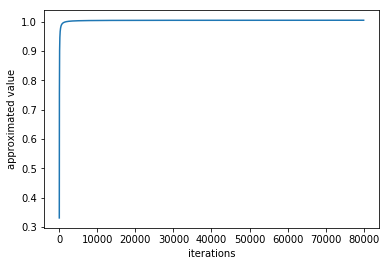

In [34]:
print(results[-1])
plt.plot(range(1,iterations+1),results)
plt.xlabel("iterations")
plt.ylabel("approximated value")
plt.show()

It converges. 

### Exercise 2

Recall that the quadratic map generates time series of the form

$$ x_{t+1} = 4 \, x_t (1 - x_t) $$

for some given $x_0$, and that these trajectories are chaotic.

This means that different initial conditions generate seemingly very different outcomes.

Nevertheless, the regions of the state space where these trajectories spend most of their time are in fact typically invariant to the initial condition.

Illustrate this by generating 100 histograms of time series generated from the quadratic map, with $x_0$ drawn independently from the uniform distribution on $(0, 1)$.  

Do they all look alike?

Try to make your code efficient.



In [35]:
x_init = np.random.uniform(0,1, 100)
@jit
def quad(x_0,T):
    res = np.zeros((len(x_0),T))
    i = 0
    for x in x_0:
        x_t = np.zeros(100)
        x_t[0] = x
        res[i][0] = x
        for t in range(1,T):
            res[i][t] = 4* res[i][t-1]*(1- res[i][t-1])
        i+=1
    return res

res = quad(x_init,10000)

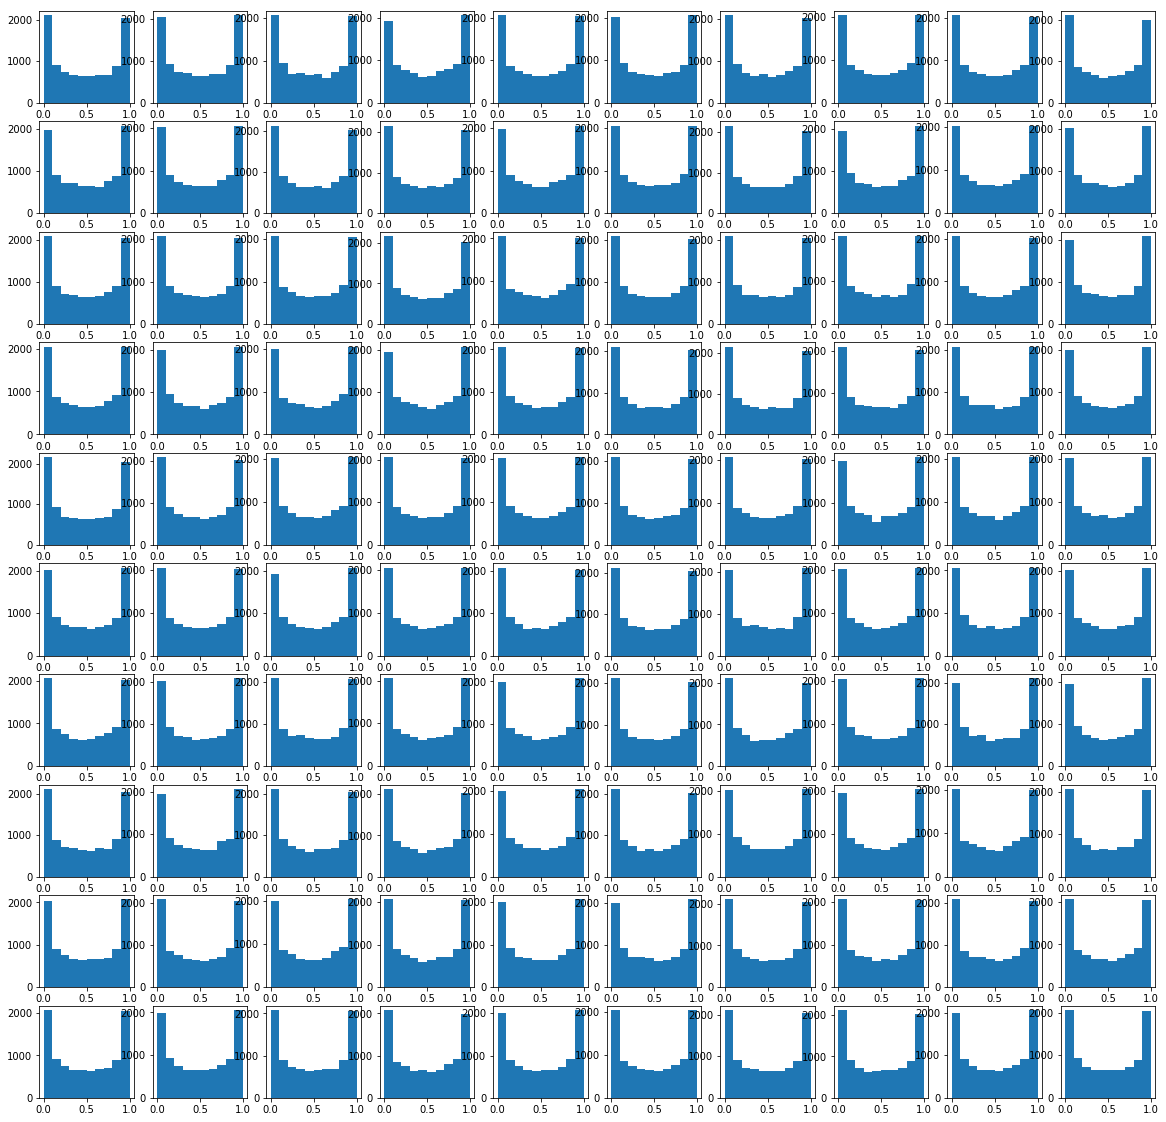

In [36]:
plt.figure(figsize=(20, 20))
i=0
for r in res:
    i+=1
    plt.subplot(10, 10, i)
    plt.hist(r)  
plt.show()

### Exercise 3

In the lecture it was claim that, if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat x$, then $\hat x$ is a steady state of $(\mathbb X, g)$.

Prove this.

According to the problem, we know that:

$\lim_{t\to\infty}g^{t}(x) = \hat x$

Similarly, $\lim_{t\to\infty}g^{t-1}(x) = \hat x$

Also since $g$ is continuous at $\hat x \in \mathbb X$ then we know that:

$\lim_{t\to\infty}g^{t}(x) = g(\lim_{t\to\infty}g^{t-1}(x))$

combined with: $g(\lim_{t\to\infty}g^{t-1}(x)) = g(\hat x)$

we have $\lim_{t\to\infty}g^{t}(x) = \hat x = g(\hat x)$

Hence, we have shown that $\hat x$ is a steady state.